In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



import warnings
warnings.filterwarnings('ignore')

In [174]:
# Read in csv data
attrition_df = pd.read_csv("data/IBM_attrition_data.csv")
data = attrition_df.copy()
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [175]:
len(data)

1470

In [176]:
# Drop unnecessary columns
data = data.drop(["Over18", "EmployeeCount", "StandardHours", "EmployeeNumber"], axis=1)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [177]:
len(data)

1470

In [178]:
# Create train and test set from data
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [179]:
# Segregating target and feature variables 
data = train_set.drop("Attrition", axis=1)
data_labels = train_set["Attrition"].copy()
# data_labels = pd.get_dummies(data_labels, drop_first=True)
len(data)

1176

In [180]:
len(data_labels)

1176

In [181]:
data_labels

1097     No
727      No
254      No
1175     No
1341     No
       ... 
1130     No
1294     No
860     Yes
1459     No
1126     No
Name: Attrition, Length: 1176, dtype: object

In [182]:
# Preprocessing categorical columns 
def preprocess_cat_columns(data):
    data["Education"] = data["Education"].map({1:"Below College", 2:"College", 3:"Bachelor", 4:"Master",5:"Doctor"}) 
    data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["JobInvolvement"] = data["JobInvolvement"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["JobSatisfaction"] = data["JobSatisfaction"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["PerformanceRating"] = data["PerformanceRating"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["WorkLifeBalance"] = data["WorkLifeBalance"].map({1:"Bad", 2:"Good", 3:"Better", 4:"Best"})
    return data


In [183]:
# Number pipeline transformer 
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

# Complete transformation for categorical and numeric data
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["BusinessTravel", "Department", "Education", 
                    "EducationField", "EnvironmentSatisfaction", "Gender",
                    "JobInvolvement", "JobRole", "JobSatisfaction", 
                    "MaritalStatus", "OverTime", "PerformanceRating", 
                    "RelationshipSatisfaction", "WorkLifeBalance"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [184]:
##from raw data to processed data in 2 steps
preprocessed_df = preprocess_cat_columns(data)
prepared_data = pipeline_transformer(data)
prepared_data

array([[-1.38855944, -1.10813858,  1.44039645, ...,  0.        ,
         1.        ,  0.        ],
       [-2.04073779, -1.2634814 , -0.52269928, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84507748,  1.10364737,  1.31770296, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.60595222,  1.1258392 , -0.76808624, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84507748,  1.42666182,  0.45884859, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.43754676, -1.32019386, -0.03192534, ...,  0.        ,
         1.        ,  0.        ]])

In [185]:
prepared_data.shape

(1176, 71)

In [186]:
## Selecting and Training Models 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(prepared_data, data_labels)

LogisticRegression()

In [187]:
print(f"Logisitc Regression Training Data Score: {log_reg.score(prepared_data, data_labels)}")

Logisitc Regression Training Data Score: 0.8988095238095238


In [188]:
## Selecting and Training Models 
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(prepared_data, data_labels)

DecisionTreeClassifier()

In [189]:
print(f"Decision Tree Training Data Score: {decision_tree.score(prepared_data, data_labels)}")

Decision Tree Training Data Score: 1.0


In [190]:
# Predicitons using Decision Tree 

attrition_predict = decision_tree.predict(prepared_data)
print(f"First 10 Predictions: {attrition_predict[:25]}")

First 10 Predictions: ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [191]:
# Random Forest Model 
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(prepared_data, data_labels)

RandomForestClassifier()

In [192]:
print(f"Random Forest Training Data Score: {forest_clf.score(prepared_data, data_labels)}")

Random Forest Training Data Score: 1.0


In [193]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(prepared_data, data_labels)

SVC(kernel='linear')

In [194]:
print(f"SVC Training Data Score: {forest_clf.score(prepared_data, data_labels)}")

SVC Training Data Score: 1.0


In [195]:
# Hyperparameter Tuning w/ GridSearchCV
from sklearn.model_selection import GridSearchCV

forest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [196]:
# Grid search with forest_clf model
param_grid = [{'n_estimators': [15, 25, 50, 75, 100], 'max_features': [1, 5, 10, 15]},
             {'bootstrap': [True], 'n_estimators': [15, 25, 50, 75, 100],'max_features': [1, 5, 10, 15] }]
grid_search = GridSearchCV(forest_clf, param_grid=param_grid, cv=5, verbose=0)

In [197]:
grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [1, 5, 10, 15],
                          'n_estimators': [15, 25, 50, 75, 100]},
                         {'bootstrap': [True], 'max_features': [1, 5, 10, 15],
                          'n_estimators': [15, 25, 50, 75, 100]}])

In [198]:
grid_search.best_estimator_

RandomForestClassifier(max_features=15, n_estimators=75)

In [199]:
# Best Params
print(grid_search.best_params_)

{'bootstrap': True, 'max_features': 15, 'n_estimators': 75}


In [200]:
cv_scores = grid_search.cv_results_

for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(mean_score), params)

0.9161333945896163 {'max_features': 1, 'n_estimators': 15}
0.9142676428459768 {'max_features': 1, 'n_estimators': 25}
0.9138040627662039 {'max_features': 1, 'n_estimators': 50}
0.9156648515953689 {'max_features': 1, 'n_estimators': 75}
0.9147349303418968 {'max_features': 1, 'n_estimators': 100}
0.9207547978501955 {'max_features': 5, 'n_estimators': 15}
0.9239861745585448 {'max_features': 5, 'n_estimators': 25}
0.9212187947478113 {'max_features': 5, 'n_estimators': 50}
0.9235216156323625 {'max_features': 5, 'n_estimators': 75}
0.9244465991095 {'max_features': 5, 'n_estimators': 100}
0.9244387972139889 {'max_features': 10, 'n_estimators': 15}
0.9248989964446029 {'max_features': 10, 'n_estimators': 25}
0.9267355624668312 {'max_features': 10, 'n_estimators': 50}
0.9249048449609503 {'max_features': 10, 'n_estimators': 75}
0.9262762756925856 {'max_features': 10, 'n_estimators': 100}
0.92120705087434 {'max_features': 15, 'n_estimators': 15}
0.9276534538286851 {'max_features': 15, 'n_estimator

In [201]:
# Checking feature importance 
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.05232122, 0.04673198, 0.04596691, 0.03931845, 0.02247535,
       0.08273287, 0.04309923, 0.03162158, 0.02755606, 0.02704455,
       0.04537438, 0.02351036, 0.03923132, 0.02531085, 0.02711764,
       0.02619305, 0.00311017, 0.01301001, 0.00545634, 0.00132957,
       0.00766828, 0.00880009, 0.00426453, 0.00595521, 0.00491169,
       0.00225848, 0.00478017, 0.00226962, 0.00542806, 0.00537628,
       0.00548908, 0.00219341, 0.00647877, 0.00482323, 0.01121355,
       0.00727894, 0.00620611, 0.00428793, 0.00632777, 0.00620785,
       0.01086374, 0.0051122 , 0.00397358, 0.00157851, 0.00296244,
       0.00724243, 0.00135198, 0.00260351, 0.00065697, 0.00512297,
       0.00759264, 0.00781375, 0.00565492, 0.01390007, 0.00406789,
       0.00685556, 0.00455614, 0.00576295, 0.02134294, 0.04693717,
       0.03658384, 0.00293505, 0.00284791, 0.00616712, 0.00768092,
       0.00236659, 0.0050084 , 0.00801296, 0.00381749, 0.00950139,
       0.008395  ])

In [202]:
objects = ['object', 'int64']
# nume = ['int64']
names = list(data.select_dtypes(include=objects))

attrs = names
feature_top = sorted(zip(attrs, feature_importances), reverse=False)
feature_top_df = pd.DataFrame(data=feature_top)
feature_top_sorted = feature_top_df.sort_values(by=1, ascending=False)
feature_top_sorted

,0,1
5,Education,0.082733
0,Age,0.052321
1,BusinessTravel,0.046732
2,DailyRate,0.045967
10,JobInvolvement,0.045374
6,EducationField,0.043099
3,Department,0.039318
12,JobRole,0.039231
7,EnvironmentSatisfaction,0.031622
8,Gender,0.027556


In [203]:
# Evaluating entire system on Test Data
final_model = grid_search.best_estimator_

X_test = test_set.drop("Attrition", axis=1)
y_test = test_set["Attrition"].copy()

X_test_preprocessed = preprocess_cat_columns(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

print('Test Acc: %.3f' % grid_search.score(X_test_prepared, y_test))

Test Acc: 0.864


In [204]:
# Make Predictions 
predictions = final_model.predict(X_test_prepared)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No']
First 10 Actual labels: ['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No']


In [205]:
# Predictions vs. actual df
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,No,No
1,No,No
2,No,Yes
3,No,No
4,No,No
...,...,...
289,No,No
290,No,No
291,No,No
292,No,No


In [206]:
# Function to cover the entire flow 
def predict_attrition(config, model):

    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config

    preproc_df = preprocess_cat_columns(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [207]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[248   7]
 [ 33   6]]


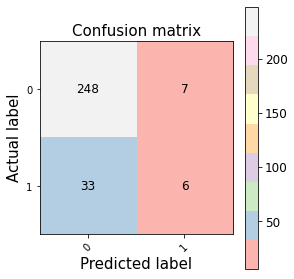

In [208]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

In [209]:
#[row, column]
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[0, 1]
fn = cm[1, 0]

In [210]:
 print("True Positives: " + str(tp))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))

True Positives: 248
True Negatives: 6
False Positives: 7
False Negatives: 33


In [211]:
from sklearn.metrics import classification_report
target_names = ["Yes", "No"]
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.88      0.97      0.93       255
          No       0.46      0.15      0.23        39

    accuracy                           0.86       294
   macro avg       0.67      0.56      0.58       294
weighted avg       0.83      0.86      0.83       294



In [212]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

In [213]:
# Classification Accuracy: Overall, how often is the classifier correct?

print("Accuracy Math:" + str((tp + tn) / float(tp + tn + fp + fn)))

accuracy = accuracy_score(y_test, predictions)
print("Accuracy Sklearn: " + str(accuracy))

Accuracy Math:0.8639455782312925
Accuracy Sklearn: 0.8639455782312925


In [214]:
# Classification Sensitivity: When the actual value is positive, how often is the prediction correct?

print("Sensitivity Math:" + str(tp / float(fn + tp))) 

recall = recall_score([1 if x == "Yes" else 0 for x in y_test], 
                            [1 if x == "Yes" else 0 for x in predictions])
print("Sensitivity Sklearn: " + str(recall))

Sensitivity Math:0.8825622775800712
Sensitivity Sklearn: 0.15384615384615385


In [215]:
# Classification Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision Math:" + str(tp / float(tp + fp))) 

precision = precision_score([1 if x == "Yes" else 0 for x in y_test], 
                            [1 if x == "Yes" else 0 for x in predictions])
print("Precision Sklearn: " + str(precision))

Precision Math:0.9725490196078431
Precision Sklearn: 0.46153846153846156


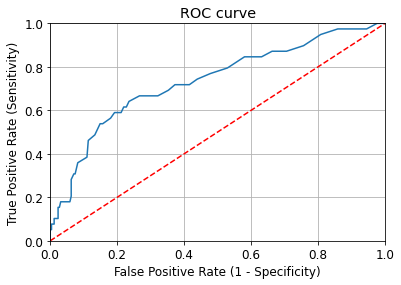

In [216]:
fpr, tpr, thresholds = roc_curve([1 if x == "Yes" else 0 for x in y_test], forest_clf.predict_proba(X_test_prepared)[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [217]:
# AUC is the percentage of the ROC plot that is underneath the curve:
# AUC is useful as a single number summary of classifier performance

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(roc_auc_score([1 if x == "Yes" else 0 for x in y_test], forest_clf.predict_proba(X_test_prepared)[:, 1]))

0.7335344394167923


In [218]:
# Saving the final model
import pickle

with open('attrition_prediction_model.bin', 'wb') as f_out: 
    pickle.dump(final_model, f_out)
    f_out.close()